In [4]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [5]:

# Step 1: Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target


In [6]:
# Step 2: Summary statistics
summary = df.describe()
summary

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
df['target'].unique()

array([0, 1, 2])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [9]:
correlation_matrix = df.drop(columns=['target']).corr()
correlation_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<Figure size 1000x600 with 0 Axes>

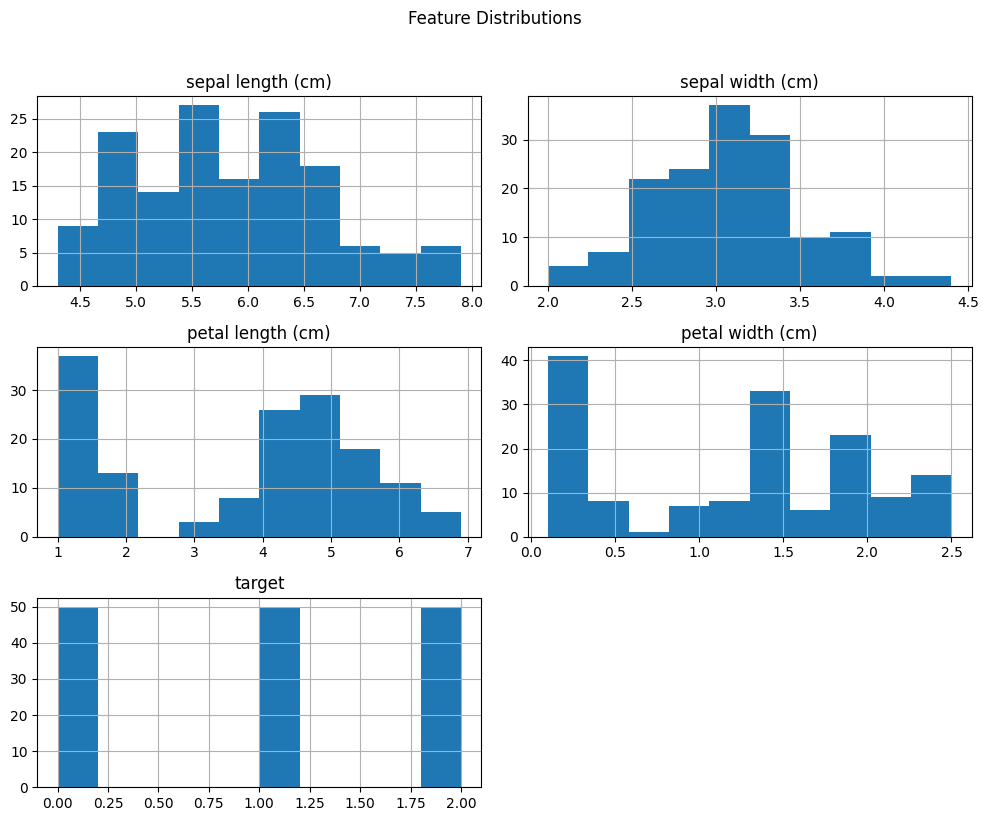

In [10]:
plt.figure(figsize=(10, 6))
df.hist(figsize=(10, 8))
plt.suptitle("Feature Distributions", y=1.02)
plt.tight_layout()
plt.show()

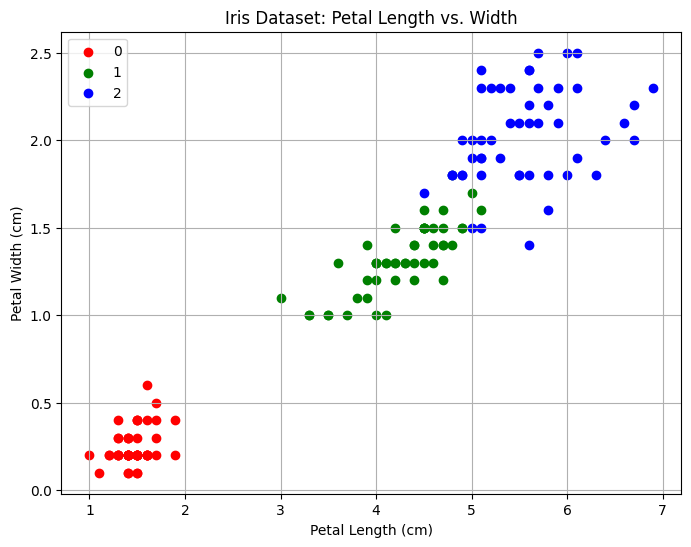

In [11]:
import matplotlib.pyplot as plt

# Define unique class names from the 'target' column
species = df['target'].unique()
colors = ['red', 'green', 'blue']

# Create scatter plot
plt.figure(figsize=(8, 6))
for i, spec in enumerate(species):
    subset = df[df['target'] == spec]
    plt.scatter(
        subset['petal length (cm)'],
        subset['petal width (cm)'],
        label=spec,
        color=colors[i]
    )

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Dataset: Petal Length vs. Width')
plt.legend()
plt.grid(True)
plt.show()


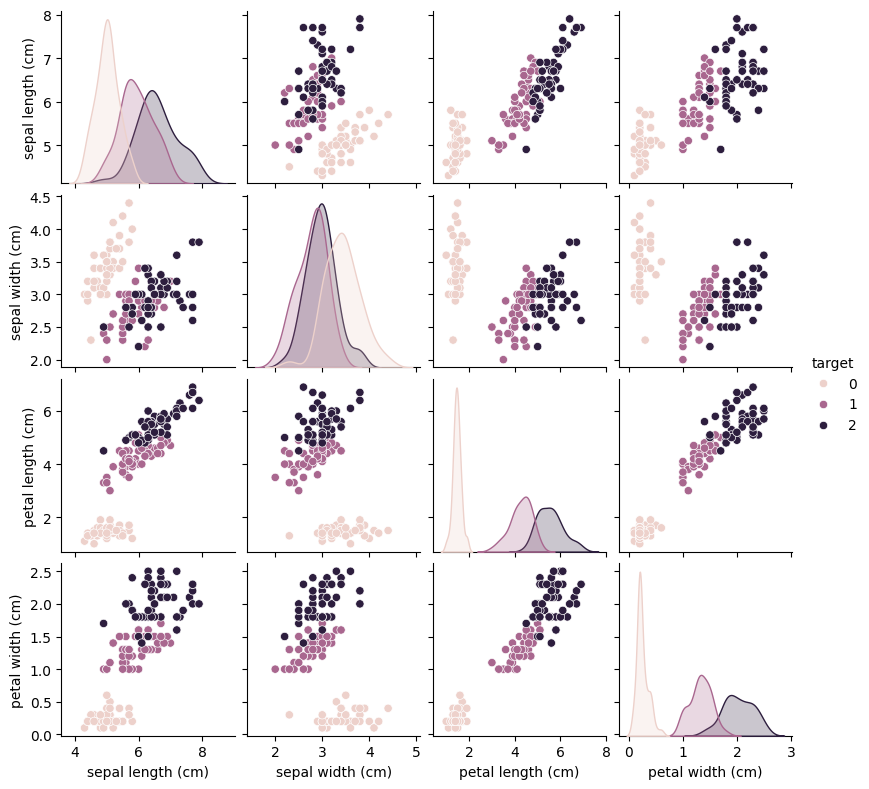

In [12]:
sns.pairplot(df, hue="target", height=2)

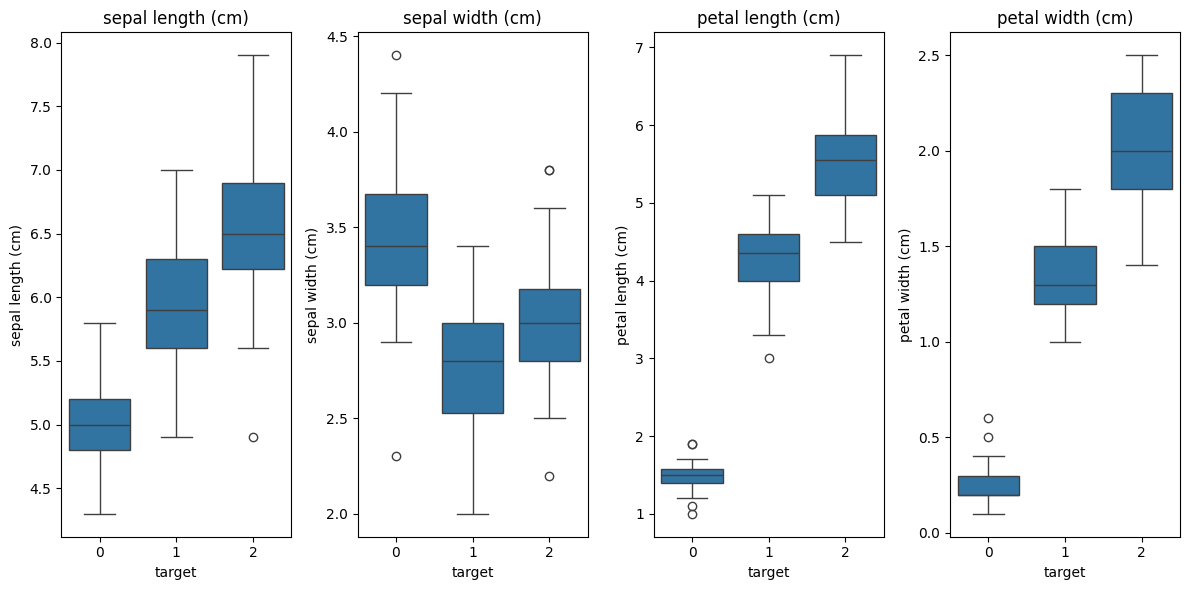

In [13]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(1, 4, i+1)
    sns.boxplot(data=df, y=col, x="target")
    plt.title(col)
plt.tight_layout()
plt.show()

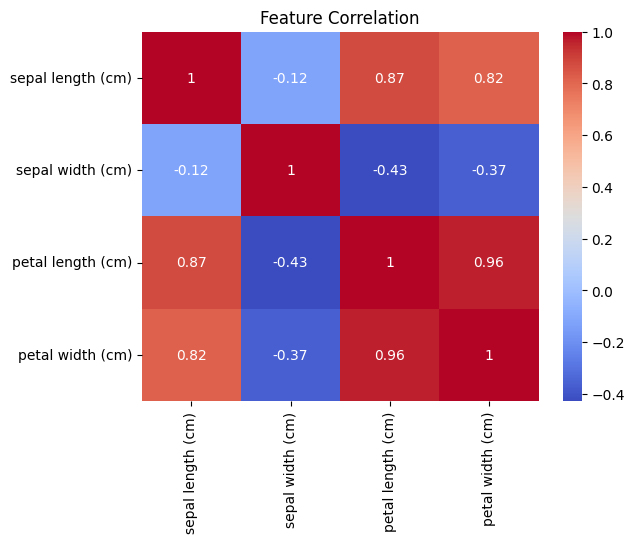

In [14]:
corr = df.drop(columns='target').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

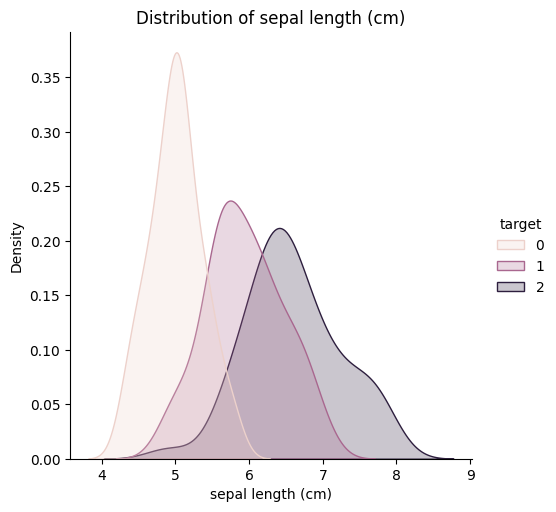

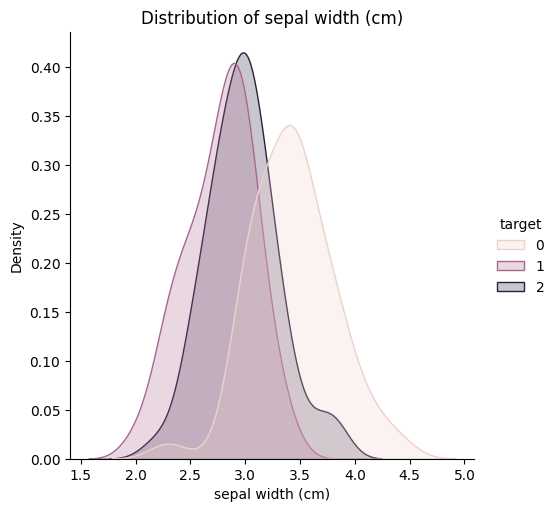

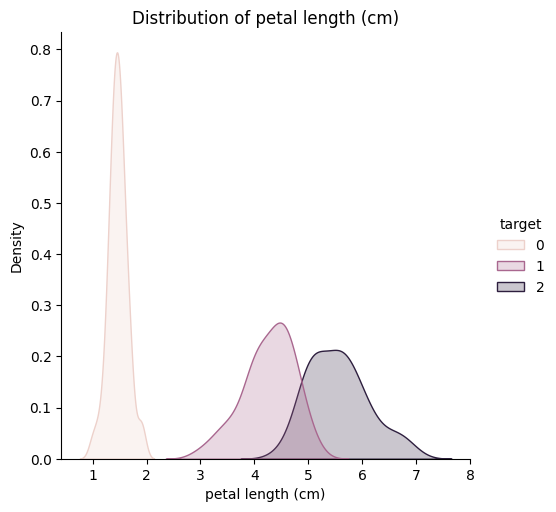

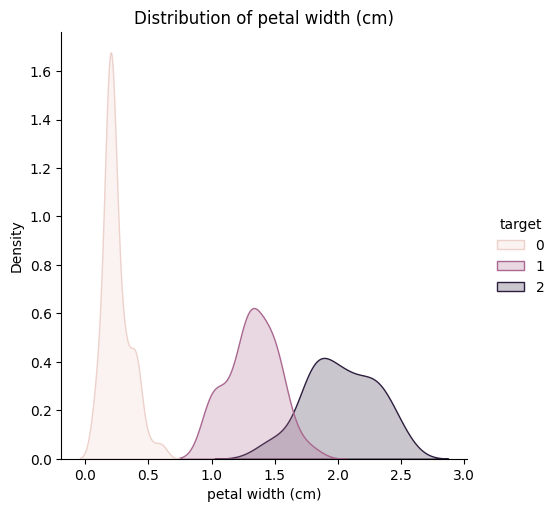

In [15]:
for col in df.columns[:-1]:
    sns.displot(df, x=col, hue='target', kind='kde', fill=True)
    plt.title(f"Distribution of {col}")
    plt.show()